<a href="https://colab.research.google.com/github/andersonxpm/mestrado-ime/blob/master/cd_trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Trabalho: Ciência de Dados / Anderson Xavier de Paiva Mello




1. Instalação dos pacotes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import partial

from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix, make_scorer, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import OneClassSVM

2. Upload do dataset

In [2]:
## PROC ##

bi = pd.read_csv('base_nt_poc.csv', encoding='latin-1')
print("Dados carregados com sucesso!")

Dados carregados com sucesso!


In [3]:
data1 = bi.copy()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88045 entries, 0 to 88044
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   data_solicitacao                  88045 non-null  object 
 1   id_prestador_executor             88045 non-null  object 
 2   classificacao_prestador_executor  88045 non-null  object 
 3   cpf_tutor                         88045 non-null  object 
 4   cidade_tutor                      88045 non-null  object 
 5   estado_tutor                      88045 non-null  object 
 6   id_pet_tutor                      88045 non-null  object 
 7   idade_pet_anos                    88045 non-null  float64
 8   especie                           88045 non-null  object 
 9   raca_pet                          88045 non-null  object 
 10  genero_pet                        88040 non-null  object 
 11  id_plano                          88045 non-null  object 
 12  valo

In [4]:
# Garantir que a coluna está no formato datetime
data1['data_solicitacao'] = pd.to_datetime(data1['data_solicitacao'])

# Datas mínima e máxima
data_min = data1['data_solicitacao'].min()
data_max = data1['data_solicitacao'].max()

print("📅 Data mínima:", data_min)
print("📅 Data máxima:", data_max)

📅 Data mínima: 2024-01-01 00:00:00
📅 Data máxima: 2024-01-31 00:00:00


3.   Limpeza dos dados



In [5]:
## PROC ##

# Gravando bi = data
data = bi.copy()

In [6]:
## PROC ##

# Tratar valores nulos - aqui, removemos as linhas com valores nulos em 'genero_pet' e valores negativos em 'idade_pet_anos' e 'valor'
data = data.dropna(subset=['genero_pet'])
data = data[(data['idade_pet_anos'] >= 0)]
data = data[(data['valor_mensal_plano'] >= 0)]
data = data[(data['valor'] >= 0)]

In [7]:
## PROC ##

# Remover colunas irrelevantes
## As variáveis numéricas não possuem alta correlação de acordo com o coeficiente de Pearson, de -1 a +1)
cols_to_remove = ['data_solicitacao', 'cpf_tutor', 'id_pet_tutor', 'id_procedimento']
data = data.drop(columns=cols_to_remove)

4. Análise exploratória

In [8]:
# Análise: tipo das variáveis
data.dtypes

,0
id_prestador_executor,object
classificacao_prestador_executor,object
cidade_tutor,object
estado_tutor,object
idade_pet_anos,float64
especie,object
raca_pet,object
genero_pet,object
id_plano,object
valor_mensal_plano,float64


In [9]:
# Análise: explorar dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78669 entries, 0 to 88044
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id_prestador_executor             78669 non-null  object 
 1   classificacao_prestador_executor  78669 non-null  object 
 2   cidade_tutor                      78669 non-null  object 
 3   estado_tutor                      78669 non-null  object 
 4   idade_pet_anos                    78669 non-null  float64
 5   especie                           78669 non-null  object 
 6   raca_pet                          78669 non-null  object 
 7   genero_pet                        78669 non-null  object 
 8   id_plano                          78669 non-null  object 
 9   valor_mensal_plano                78669 non-null  float64
 10  ds_grupo_procedimento             78669 non-null  object 
 11  valor                             78669 non-null  float64
 12  fl_glosa_

In [10]:
# Análise: descrição do dataset
data.describe(include='all')

,id_prestador_executor,classificacao_prestador_executor,cidade_tutor,estado_tutor,idade_pet_anos,especie,raca_pet,genero_pet,id_plano,valor_mensal_plano,ds_grupo_procedimento,valor,fl_glosa_definitiva
count,78669,78669,78669,78669,78669.000000,78669,78669,78669,78669,78669.000000,78669,78669.000000,78669.000000
unique,1472,171,395,24,NaN,2,154,2,32,NaN,14,NaN,NaN
top,b'\xe5\xfc\xf2H\x12\xe6X^\xac\x0e\xa6\xf1\xa5\...,Clínicas 24h,São Paulo,SP,NaN,Cachorro,Vira-lata / Sem Raça Definida P/M Porte,feminino,b'/\x04\x84\xcf{\xfe\x8d\x1e\xd2D\xa7\x82{)\xc...,NaN,Exames laboratoriais simples,NaN,NaN
freq,2586,33371,37677,56524,NaN,68823,21828,39430,30883,NaN,31798,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.612935,NaN,NaN,NaN,NaN,247.600899,NaN,38.106087,0.014072
std,NaN,NaN,NaN,NaN,4.246653,NaN,NaN,NaN,NaN,167.875693,NaN,74.036257,0.117787
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,174.825000,NaN,7.000000,0.000000
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,174.825000,NaN,15.000000,0.000000
75%,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,320.075000,NaN,45.000000,0.000000


In [11]:
# Verificando valores nulos
print("Valores nulos por coluna:\n", data.isnull().sum())

Valores nulos por coluna:
 id_prestador_executor               0
classificacao_prestador_executor    0
cidade_tutor                        0
estado_tutor                        0
idade_pet_anos                      0
especie                             0
raca_pet                            0
genero_pet                          0
id_plano                            0
valor_mensal_plano                  0
ds_grupo_procedimento               0
valor                               0
fl_glosa_definitiva                 0
dtype: int64


In [12]:
# Verificando valores negativos
negativos = data.select_dtypes(include=[np.number]).lt(0).sum()
print("Valores negativos por coluna:\n", negativos[negativos > 0])

Valores negativos por coluna:
 Series([], dtype: int64)


In [32]:
# Proporção de glosas
data['fl_glosa_definitiva'].value_counts(normalize=True)

,proportion
fl_glosa_definitiva,
0,0.985928
1,0.014072


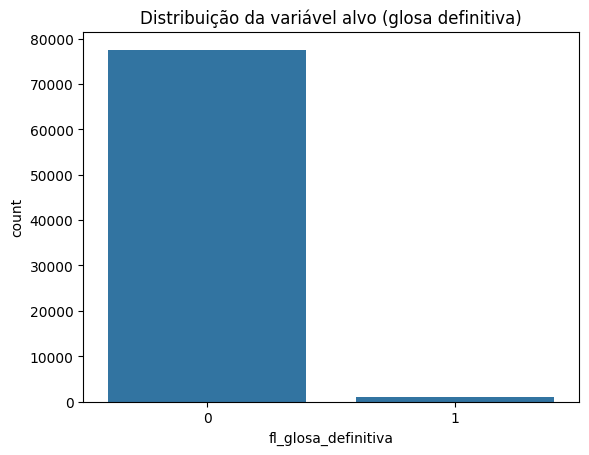

In [16]:
# Proporção de glosas - distribuição da variável alvo
sns.countplot(data=data, x='fl_glosa_definitiva')
plt.title('Distribuição da variável alvo (glosa definitiva)')
plt.show()

In [17]:
# Cardinalidade das variáveis
data.nunique().sort_values(ascending=False)

,0
valor,4985
id_prestador_executor,1472
cidade_tutor,395
classificacao_prestador_executor,171
raca_pet,154
valor_mensal_plano,110
idade_pet_anos,33
id_plano,32
estado_tutor,24
ds_grupo_procedimento,14


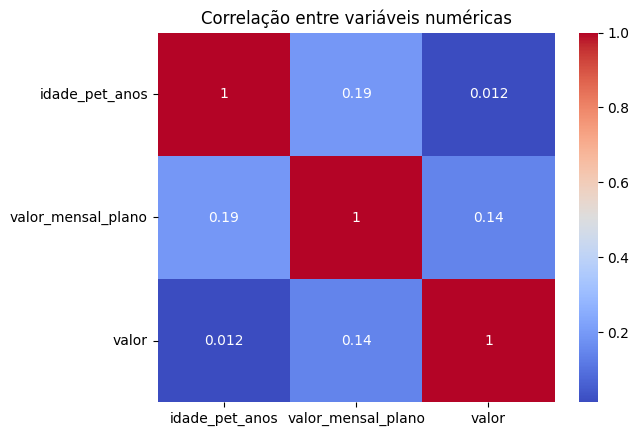

In [18]:
# Correlação entre variáveis numéricas
num_cols = ['idade_pet_anos', 'valor_mensal_plano', 'valor']

sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis numéricas')
plt.show()

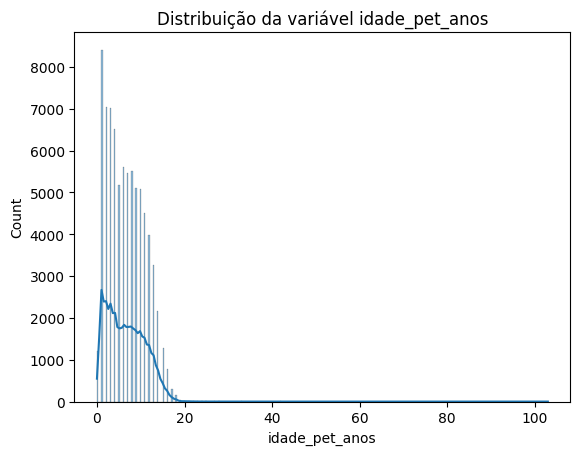

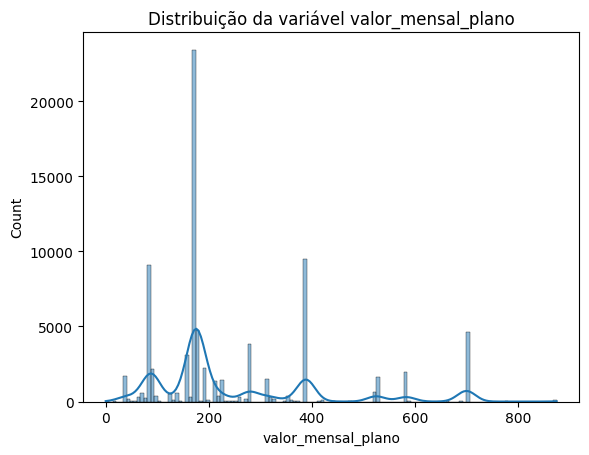

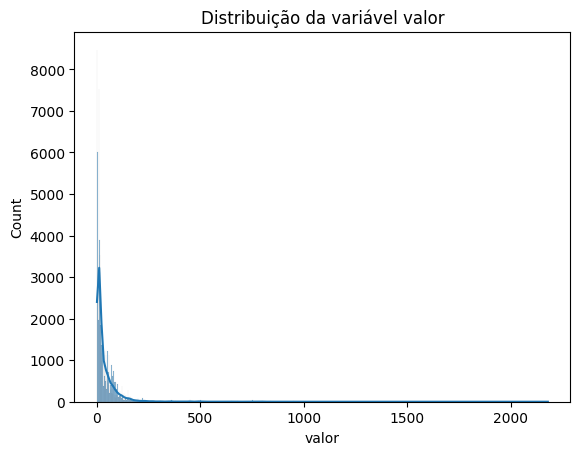

NameError: name 'data2' is not defined

In [19]:
# Análise univariada de variáveis contínuas
num_cols = ['idade_pet_anos', 'valor_mensal_plano', 'valor']

for col in num_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribuição da variável {col}')
    plt.show()

for col in num_cols:
    sns.boxplot(data=data2, x='fl_glosa_definitiva', y=col)
    plt.title(f'{col} por glosa')
    plt.show()

In [ ]:
# Análise univariada de variáveis contínuas - estatísticas básicas
num_cols = data.select_dtypes(include=['number'])

# Média
media = num_cols.mean()

# Desvio padrão
desvio = num_cols.std()

# Moda (pode haver mais de uma, por isso [0])
moda = num_cols.mode().iloc[0]

resumo = pd.DataFrame({
    'média': media,
    'moda': moda,
    'desvio_padrão': desvio
})

print(resumo)

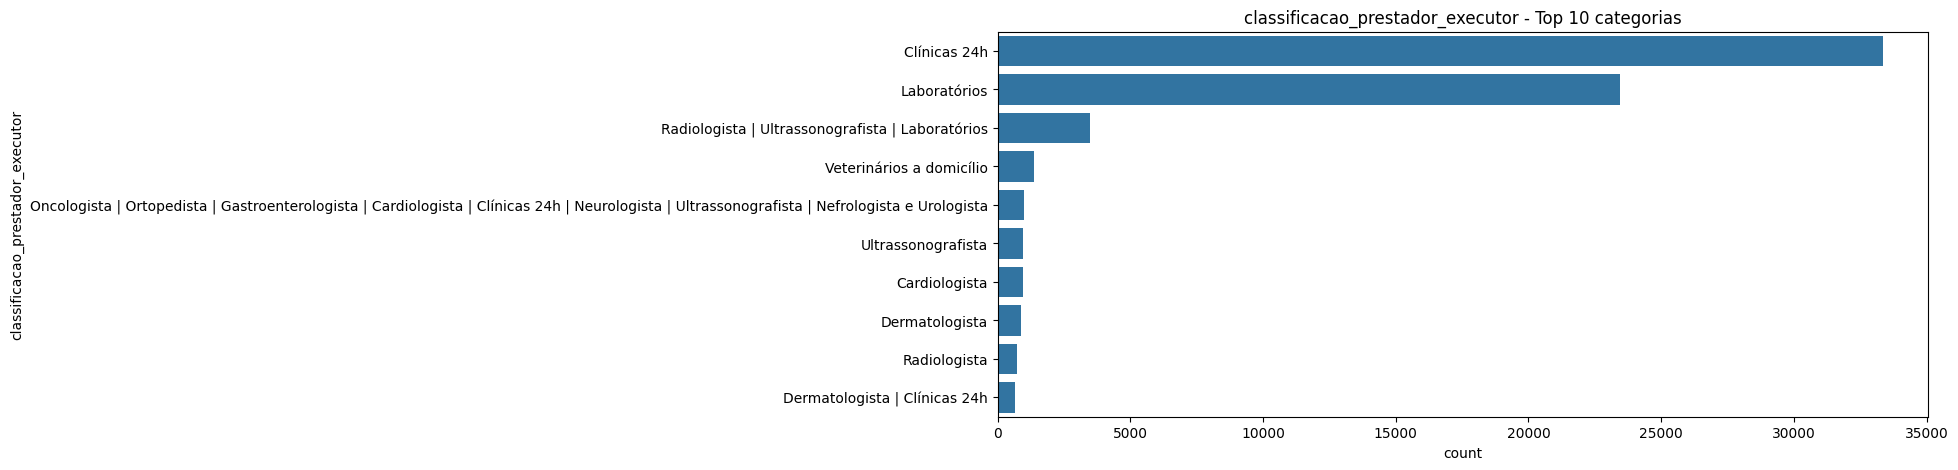

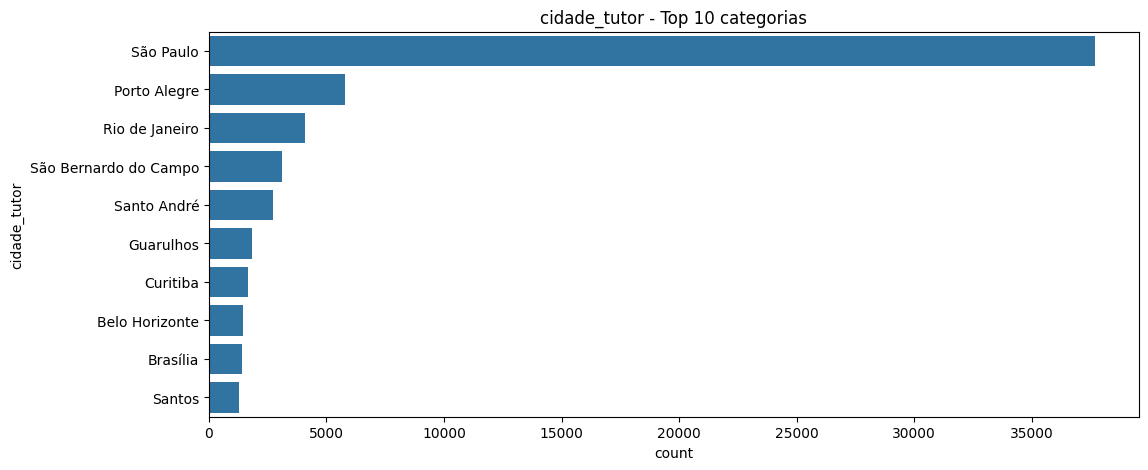

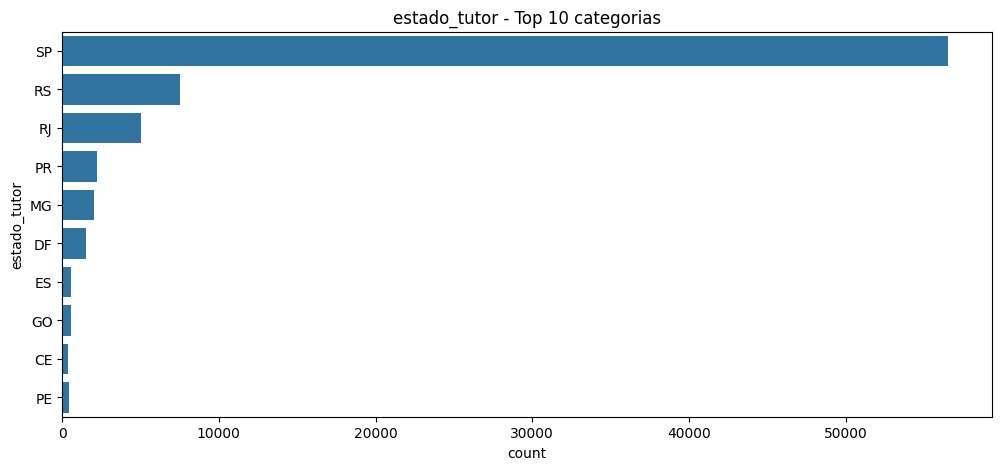

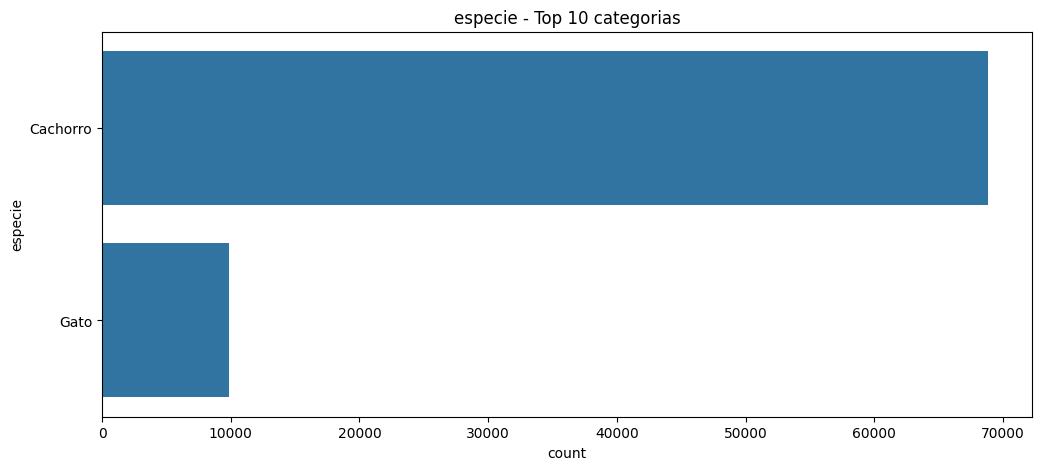

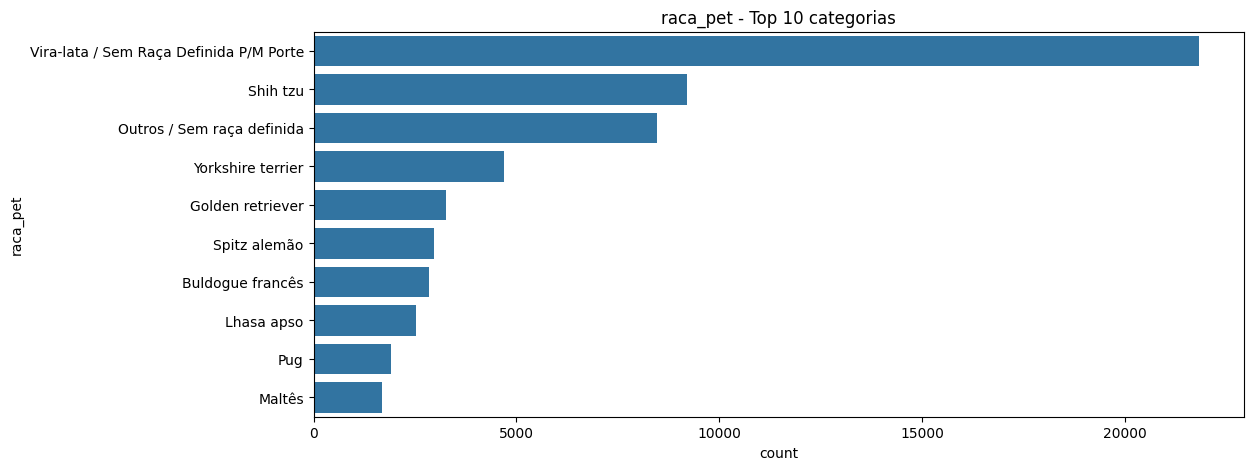

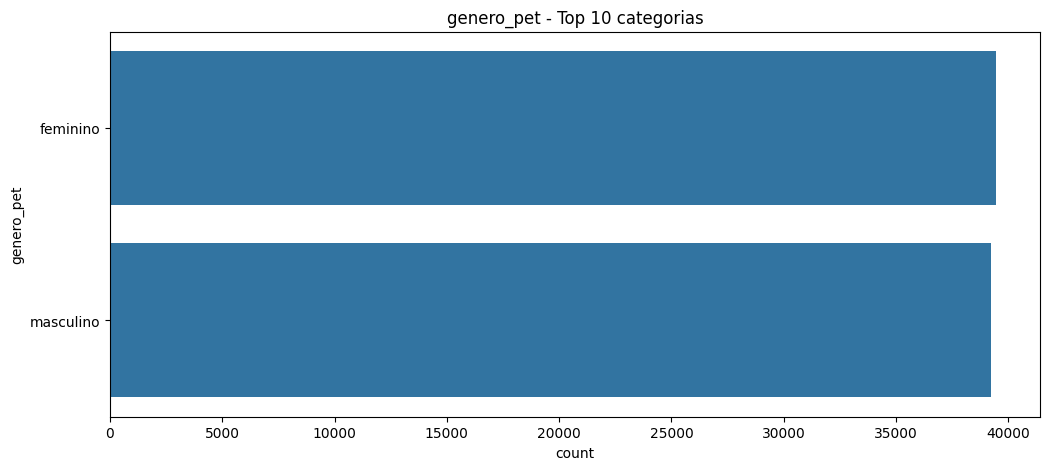

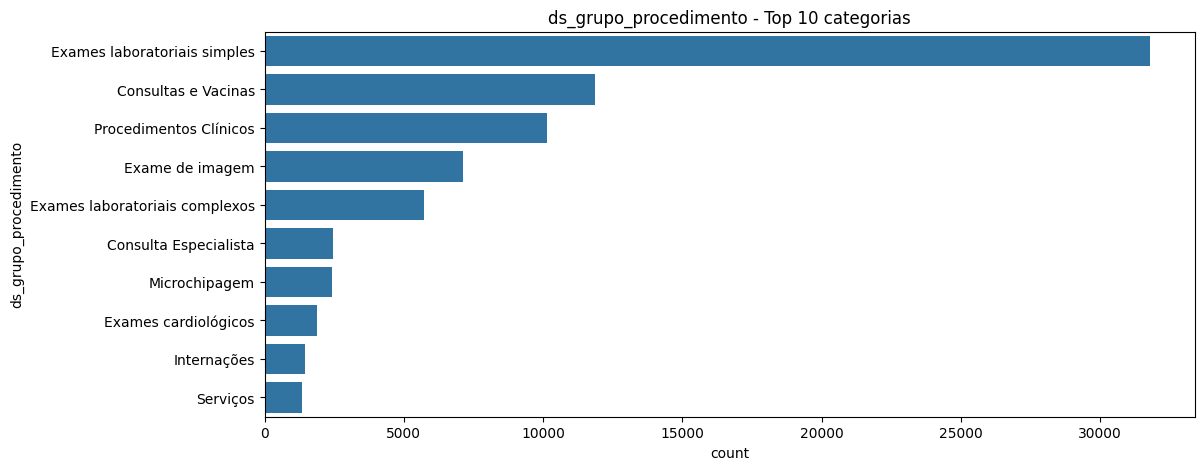

In [20]:
# Análise univariada de variáveis categóricas
cat_cols = ['classificacao_prestador_executor', 'cidade_tutor', 'estado_tutor',
            'especie', 'raca_pet', 'genero_pet', 'ds_grupo_procedimento']

for col in cat_cols:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=data, y=col, order=bi[col].value_counts().index[:10])
    plt.title(f'{col} - Top 10 categorias')
    plt.show()

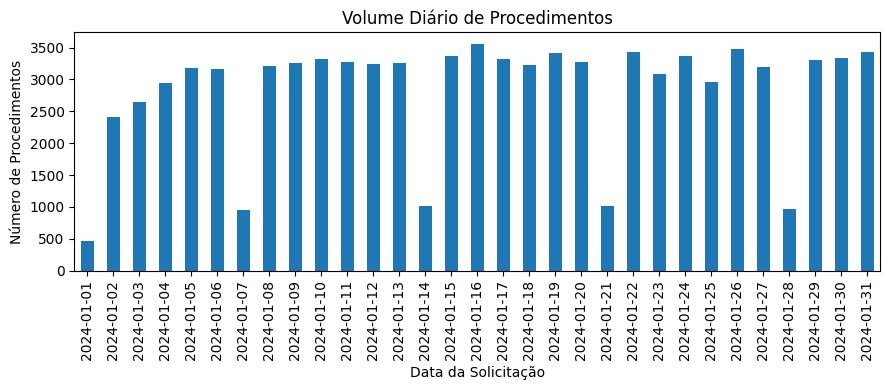

In [21]:
# Converter a coluna de datas para datetime (se ainda não estiver)
data1 = bi.copy()
##data1['data_solicitacao'] = pd.to_datetime(data1['data_solicitacao'])

# Agrupar por data e contar o número de procedimentos por dia
volume_diario = data1.groupby('data_solicitacao').size()

# Plotar
plt.figure(figsize=(9, 4))
volume_diario.plot(kind='bar')
plt.title('Volume Diário de Procedimentos')
plt.xlabel('Data da Solicitação')
plt.ylabel('Número de Procedimentos')
plt.tight_layout()
plt.show()

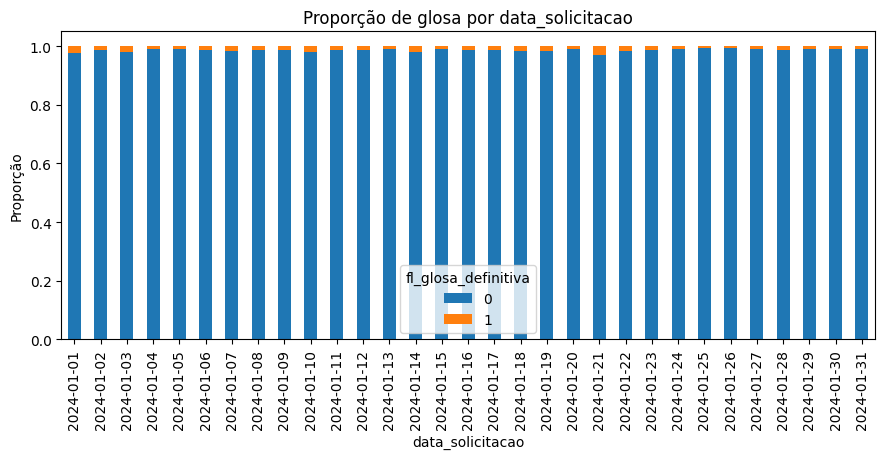

In [22]:
# Análise bivariada categórica × glosa
prop_df = pd.crosstab(data1['data_solicitacao'], data1['fl_glosa_definitiva'], normalize='index')
prop_df.plot(kind='bar', stacked=True, figsize=(10.5, 4))
plt.title('Proporção de glosa por data_solicitacao')
plt.ylabel('Proporção')
plt.show()

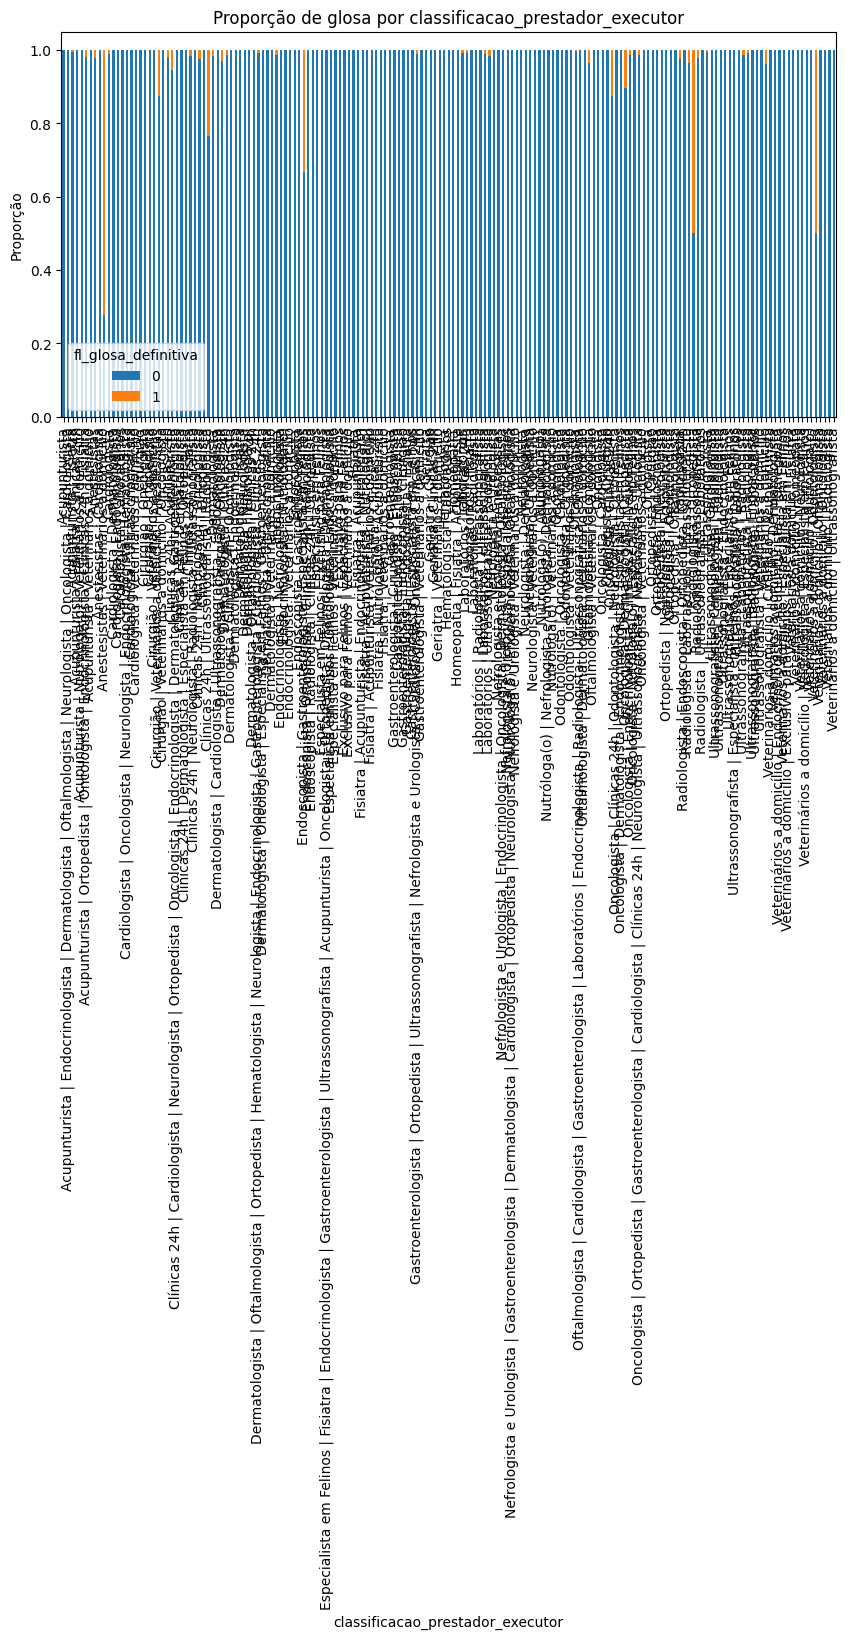

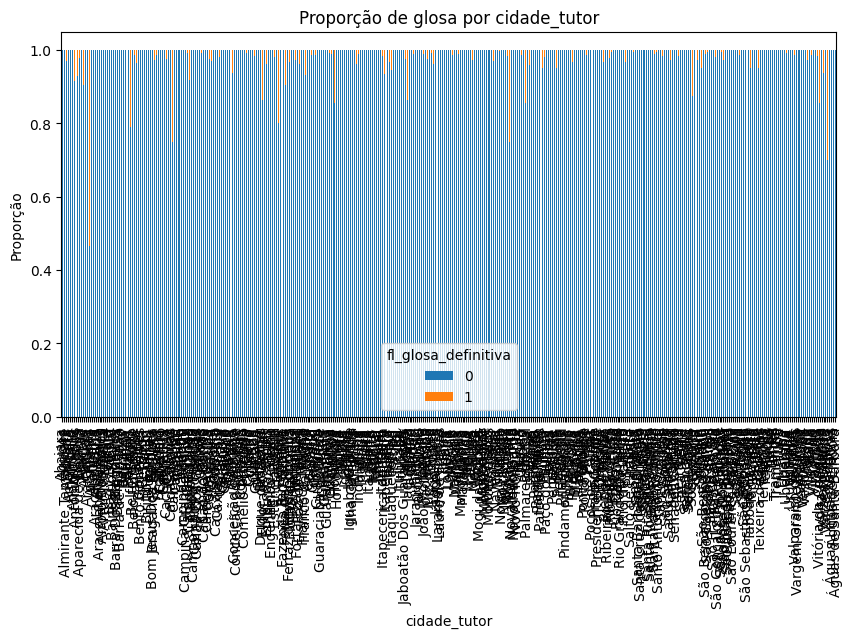

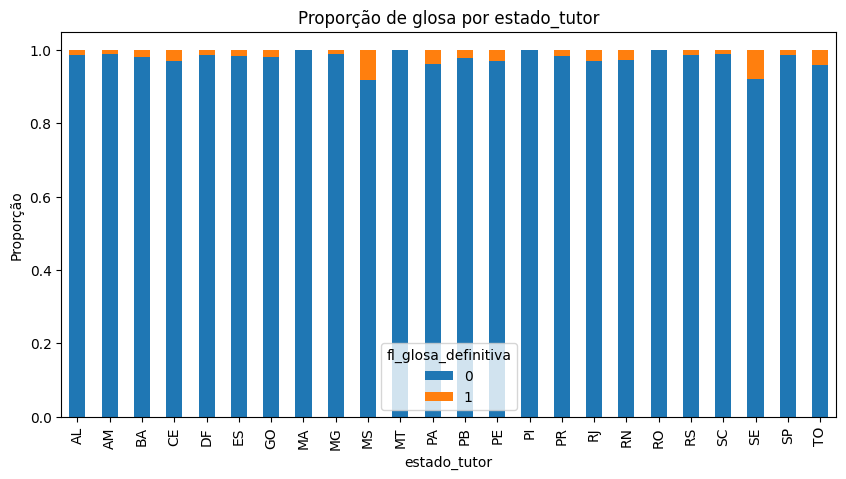

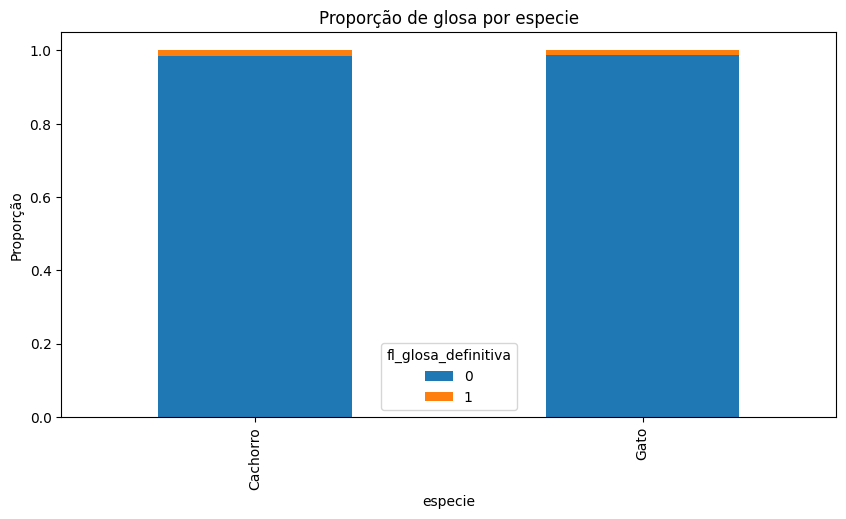

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


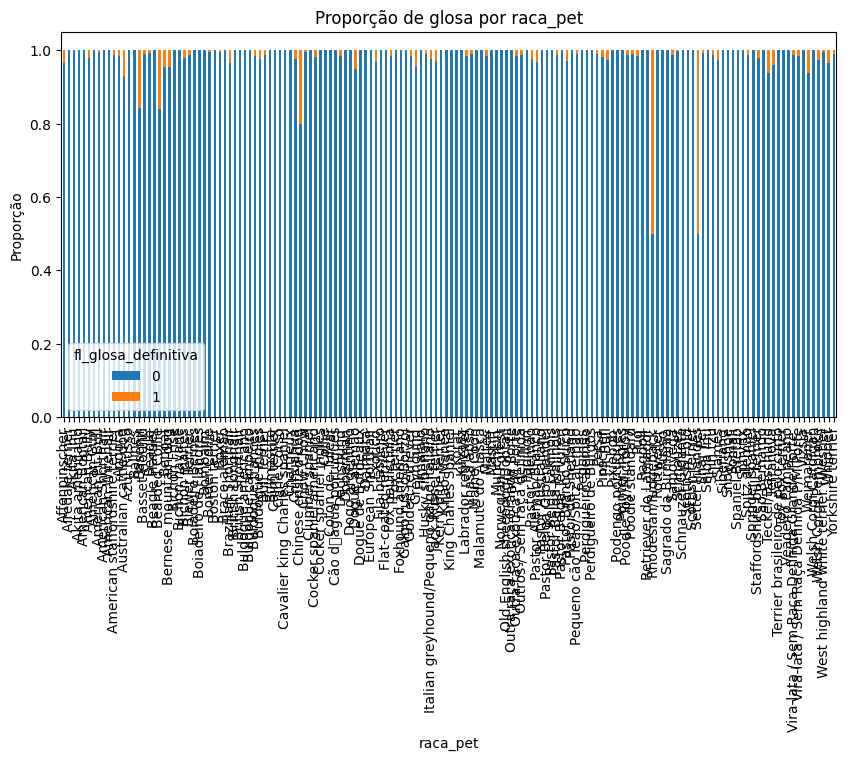

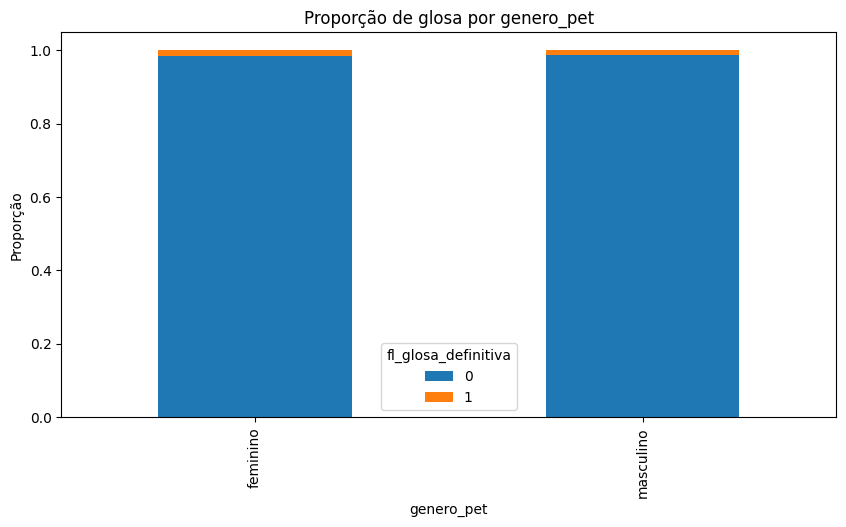

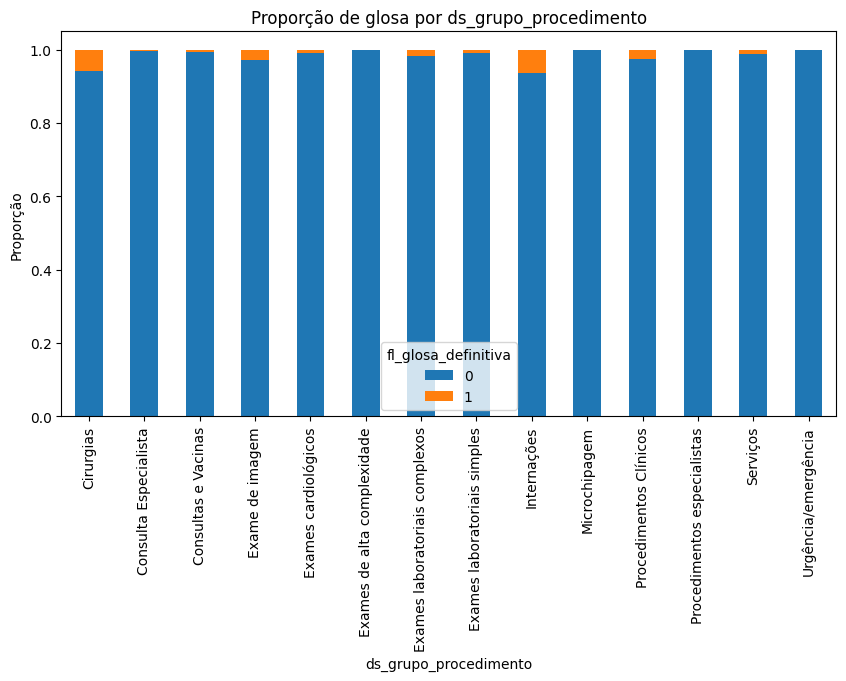

In [23]:
# Análise bivariada categórica × glosa
cat_cols = ['classificacao_prestador_executor', 'cidade_tutor', 'estado_tutor',
            'especie', 'raca_pet', 'genero_pet', 'ds_grupo_procedimento']

for col in cat_cols:
    prop_df = pd.crosstab(data[col], data['fl_glosa_definitiva'], normalize='index')
    prop_df.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f'Proporção de glosa por {col}')
    plt.ylabel('Proporção')
    plt.show()

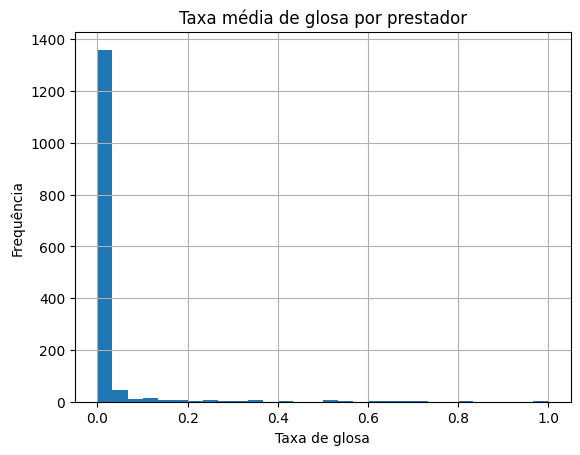

In [24]:
# Balanceamento da base (ver repetição de prestadores, procedimentos etc.)
prestador_glosa = data.groupby('id_prestador_executor')['fl_glosa_definitiva'].mean()
prestador_glosa.hist(bins=30)
plt.title('Taxa média de glosa por prestador')
plt.xlabel('Taxa de glosa')
plt.ylabel('Frequência')
plt.show()

5. Deteccao de outliers

In [26]:
## PROC ##

# Deteccao de outlier
coluna = 'idade_pet_anos'  # Substitua pelo nome da coluna a analisar

Q1 = data[coluna].quantile(0.25)
Q3 = data[coluna].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limites para '{coluna}': {limite_inferior:.2f} a {limite_superior:.2f}")

data[f'{coluna}_outlier'] = (data[coluna] <= limite_inferior) | (data[coluna] >= limite_superior)

##data[['idade_pet_anos', 'idade_pet_anos_outlier']].head(10)
##data.loc[data[f'{coluna}_outlier'] == True, ['idade_pet_anos', 'idade_pet_anos_outlier']]

Limites para 'idade_pet_anos': -7.50 a 20.50


In [27]:
## PROC ##

# Deteccao de outlier
coluna = 'valor_mensal_plano'  # Substitua pelo nome da coluna a analisar

Q1 = data[coluna].quantile(0.25)
Q3 = data[coluna].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limites para '{coluna}': {limite_inferior:.2f} a {limite_superior:.2f}")

data[f'{coluna}_outlier'] = (data[coluna] <= limite_inferior) | (data[coluna] >= limite_superior)

##data[['valor_mensal_plano', 'valor_mensal_plano_outlier']].head(10)
##data.loc[data[f'{coluna}_outlier'] == True, ['valor_mensal_plano', 'valor_mensal_plano_outlier']]

Limites para 'valor_mensal_plano': -43.05 a 537.95


In [28]:
## PROC ##

# Deteccao de outlier
coluna = 'valor'  # Substitua pelo nome da coluna a analisar

Q1 = data[coluna].quantile(0.25)
Q3 = data[coluna].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limites para '{coluna}': {limite_inferior:.2f} a {limite_superior:.2f}")

data[f'{coluna}_outlier'] = (data[coluna] <= limite_inferior) | (data[coluna] >= limite_superior)

##data[['valor', 'valor_outlier']].head(10)
##data.loc[data[f'{coluna}_outlier'] == True, ['valor', 'valor_outlier']]

Limites para 'valor': -50.00 a 102.00


In [29]:
## PROC ##

# Removendo outliers
data2 = data.copy()

data2 = data2[data2['idade_pet_anos_outlier'] == False]
data2 = data2[data2['valor_mensal_plano_outlier'] == False]
data2 = data2[data2['valor_outlier'] == False]

In [30]:
## PROC ##

# Removendo a coluna auxiliar dos outliers
data2 = data2.drop(columns=['idade_pet_anos_outlier'])
data2 = data2.drop(columns=['valor_mensal_plano_outlier'])
data2 = data2.drop(columns=['valor_outlier'])

In [31]:
# Contagem da variavel de controle
data2['fl_glosa_definitiva'].value_counts()

,count
fl_glosa_definitiva,
0,65785
1,991


Preparação das bases para os modelos
---

In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66776 entries, 0 to 81479
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id_prestador_executor             66776 non-null  object 
 1   classificacao_prestador_executor  66776 non-null  object 
 2   cidade_tutor                      66776 non-null  object 
 3   estado_tutor                      66776 non-null  object 
 4   idade_pet_anos                    66776 non-null  float64
 5   especie                           66776 non-null  object 
 6   raca_pet                          66776 non-null  object 
 7   genero_pet                        66776 non-null  object 
 8   id_plano                          66776 non-null  object 
 9   valor_mensal_plano                66776 non-null  float64
 10  ds_grupo_procedimento             66776 non-null  object 
 11  valor                             66776 non-null  float64
 12  fl_glosa_

In [34]:
# Separando X (features) e y (rótulo real de glosa)
data3 = data2.copy()

col_order = ['id_plano',
             'id_prestador_executor',
             'classificacao_prestador_executor',
             'ds_grupo_procedimento',
             'cidade_tutor',
             'estado_tutor',
             'especie',
             'raca_pet',
             'genero_pet',
             'idade_pet_anos',
             'valor',
             'valor_mensal_plano',
             'fl_glosa_definitiva']

data3 = data3[col_order]

X = data3.drop(columns=['fl_glosa_definitiva', 'id_plano', 'id_prestador_executor']) # Drop ID columns
y_true = data3['fl_glosa_definitiva']

# Split com estratificação para manter a proporção de glosas
X_train, X_test, y_train, y_test = train_test_split(
    X, y_true, stratify=y_true, test_size=0.3, random_state=42)

# Identifica as variáveis/colunas categóricas
categorical_cols = X_train.select_dtypes(include='object').columns

# Aplica o one-hot encoding nas bases de treino e teste
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Reindex X_test para dar match com X_train depois do one-hot encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Regressão Logística - Modelo
---

In [35]:
# Copiando as variáveis
X_rl = X.copy()
y_true_rl = y_true.copy()

X_train_rl = X_train.copy()
X_test_rl = X_test.copy()
y_train_rl = y_train.copy()
y_test_rl = y_test.copy()

X_train_scaled_rl = X_train_scaled.copy()
X_test_scaled_rl = X_test_scaled.copy()

# Identificando as variáveis categóricas
categorical_cols_rl = X_rl.select_dtypes(include='object').columns

# Aplicando one-hot encoding nas variáveis categóricas
X_rl = pd.get_dummies(X_rl, columns=categorical_cols_rl, drop_first=True)

# Pipeline SEM balanceamento
pipeline_sem_balanceamento = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Pipeline COM balanceamento MOTE
pipeline_com_smote = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Pipeline COM balanceamento class_weight='balanced'
pipeline_com_class_weight = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

In [36]:
# Treinamento dos pipelines
pipeline_sem_balanceamento.fit(X_train_rl, y_train_rl)
pipeline_com_smote.fit(X_train_rl, y_train_rl)
pipeline_com_class_weight.fit(X_train_rl, y_train_rl)

# Predições
y_pred_sem_rl = pipeline_sem_balanceamento.predict(X_test_rl)
y_pred_smote_rl = pipeline_com_smote.predict(X_test_rl)
y_pred_weight_rl = pipeline_com_class_weight.predict(X_test_rl)

y_proba_sem_rl = pipeline_sem_balanceamento.predict_proba(X_test_rl)[:, 1]
y_proba_smote_rl = pipeline_com_smote.predict_proba(X_test_rl)[:, 1]
y_proba_weight_rl = pipeline_com_class_weight.predict_proba(X_test_rl)[:, 1]


🔍 Classification Report:
              precision    recall  f1-score   support

           0     0.9920    0.9984    0.9952     19736
           1     0.8166    0.4646    0.5923       297

    accuracy                         0.9905     20033
   macro avg     0.9043    0.7315    0.7937     20033
weighted avg     0.9894    0.9905    0.9892     20033


📊 Confusion Matrix:
[[19705    31]
 [  159   138]]

📈 ROC AUC: 0.9719
📉 PR AUC (Average Precision): 0.6431


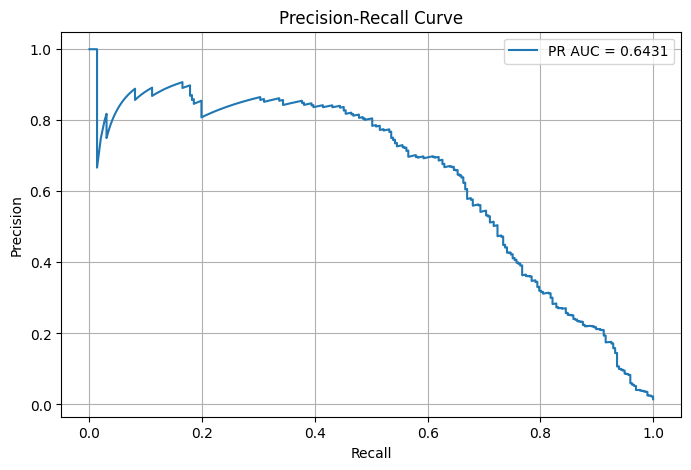

In [37]:
# Métricas - RL sem balanceamento
y_true_binary = y_test_rl
y_pred_binary = y_pred_sem_rl
y_pred_proba = y_proba_sem_rl

print("\n🔍 Classification Report:")
print(classification_report(y_true_binary, y_pred_binary, digits=4))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_true_binary, y_pred_binary))

roc_auc = roc_auc_score(y_true_binary, y_pred_proba)
pr_auc = average_precision_score(y_true_binary, y_pred_proba)
print(f"\n📈 ROC AUC: {roc_auc:.4f}")
print(f"📉 PR AUC (Average Precision): {pr_auc:.4f}")

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_true_binary, y_pred_proba)
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()


🔍 Classification Report:
              precision    recall  f1-score   support

           0     0.9985    0.9564    0.9770     19736
           1     0.2376    0.9024    0.3761       297

    accuracy                         0.9556     20033
   macro avg     0.6180    0.9294    0.6766     20033
weighted avg     0.9872    0.9556    0.9681     20033


📊 Confusion Matrix:
[[18876   860]
 [   29   268]]

📈 ROC AUC: 0.9822
📉 PR AUC (Average Precision): 0.6504


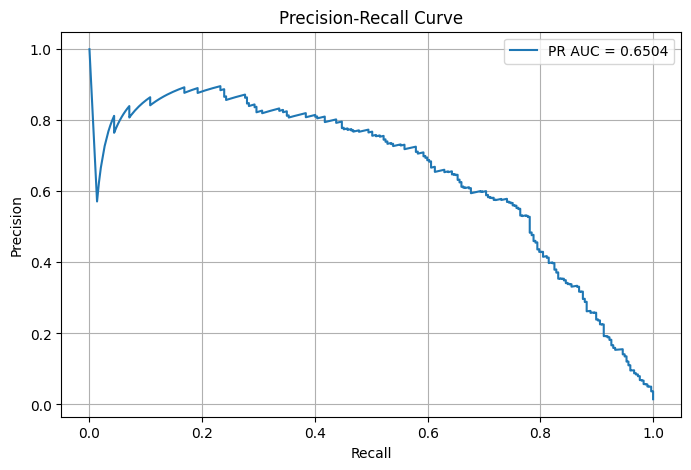

In [38]:
# Métricas - RL com balanceamento SMOTE
y_true_binary = y_test_rl
y_pred_binary = y_pred_smote_rl
y_pred_proba = y_proba_smote_rl


print("\n🔍 Classification Report:")
print(classification_report(y_true_binary, y_pred_binary, digits=4))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_true_binary, y_pred_binary))

roc_auc = roc_auc_score(y_true_binary, y_pred_proba)
pr_auc = average_precision_score(y_true_binary, y_pred_proba)
print(f"\n📈 ROC AUC: {roc_auc:.4f}")
print(f"📉 PR AUC (Average Precision): {pr_auc:.4f}")

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_true_binary, y_pred_proba)
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()


🔍 Classification Report:
              precision    recall  f1-score   support

           0     0.9987    0.9493    0.9733     19736
           1     0.2137    0.9158    0.3465       297

    accuracy                         0.9488     20033
   macro avg     0.6062    0.9326    0.6599     20033
weighted avg     0.9870    0.9488    0.9641     20033


📊 Confusion Matrix:
[[18735  1001]
 [   25   272]]

📈 ROC AUC: 0.9839
📉 PR AUC (Average Precision): 0.6695


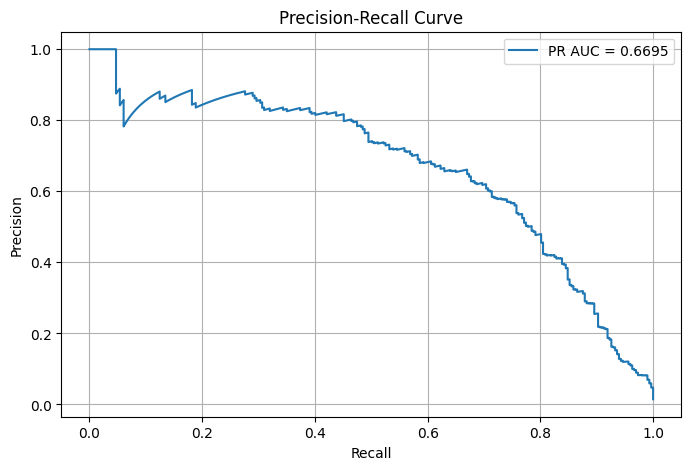

In [39]:
# Métricas - RL com balanceamento class_weight='balanced'
y_true_binary = y_test_rl
y_pred_binary = y_pred_weight_rl
y_pred_proba = y_proba_weight_rl


print("\n🔍 Classification Report:")
print(classification_report(y_true_binary, y_pred_binary, digits=4))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_true_binary, y_pred_binary))

roc_auc = roc_auc_score(y_true_binary, y_pred_proba)
pr_auc = average_precision_score(y_true_binary, y_pred_proba)
print(f"\n📈 ROC AUC: {roc_auc:.4f}")
print(f"📉 PR AUC (Average Precision): {pr_auc:.4f}")

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_true_binary, y_pred_proba)
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()

Isolation Forest - Modelo
---

In [40]:
# Copiando as variáveis
X_if = X.copy()
y_true_if = y_true.copy()

X_train_if = X_train.copy()
X_test_if = X_test.copy()
y_train_if = y_train.copy()
y_test_if = y_test.copy()

X_train_scaled_if = X_train_scaled.copy()
X_test_scaled_if = X_test_scaled.copy()

# Identificando as variáveis categóricas
categorical_cols_if = X_if.select_dtypes(include='object').columns

# Aplicando one-hot encoding nas variáveis categóricas
X_if = pd.get_dummies(X_if, columns=categorical_cols_if, drop_first=True)

# Treinando o modelo não supervisionado
iso = IsolationForest(contamination=0.015, random_state=42)  # Ajustando a contaminação conforme a taxa de glosa real
iso.fit(X_train_scaled_if) # Ajustando apenas os dados de treinamento

# Predição no conjunto de teste
y_pred_test_if = iso.predict(X_test_scaled_if)

# Isolation Forest retorna:
# -1 para anomalia
#  1 para normal
# Vamos transformar para 1 = glosa (anomalia), 0 = normal, para bater com y_true
y_pred_bin_if = np.where(y_pred_test_if == -1, 1, 0)


🔍 Classification Report:
              precision    recall  f1-score   support

           0     0.9853    0.9844    0.9849     19736
           1     0.0223    0.0236    0.0229       297

    accuracy                         0.9702     20033
   macro avg     0.5038    0.5040    0.5039     20033
weighted avg     0.9710    0.9702    0.9706     20033


📊 Confusion Matrix:
[[19429   307]
 [  290     7]]

📈 ROC AUC: 0.5281
📉 PR AUC (Average Precision): 0.0166


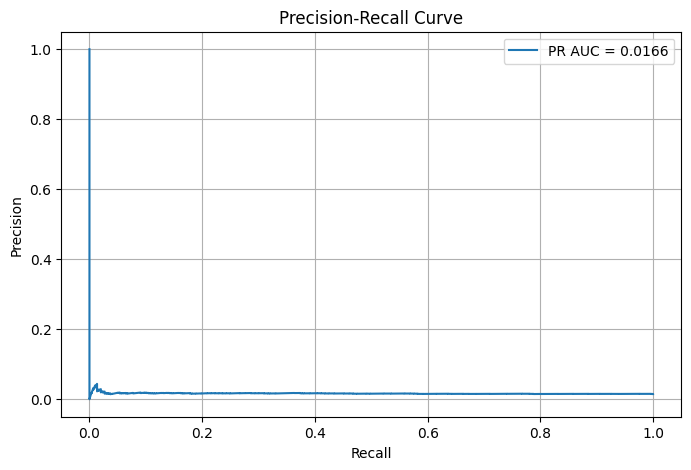

In [41]:
# Métricas
print("\n🔍 Classification Report:")
print(classification_report(y_test_if, y_pred_bin_if, digits=4))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test_if, y_pred_bin_if))

# Isolation Forest does not output probabilities, so we cannot calculate ROC AUC and PR AUC in the traditional way
# However, we can use the decision_function output as a score
y_scores_if = iso.decision_function(X_test_scaled_if)

# In Isolation Forest, lower scores indicate anomalies (glosa)
# We need to invert the scores for ROC AUC and PR AUC where higher scores indicate the positive class (glosa=1)
y_scores_inverted_if = -y_scores_if

roc_auc = roc_auc_score(y_test_if, y_scores_inverted_if)
pr_auc = average_precision_score(y_test_if, y_scores_inverted_if)
print(f"\n📈 ROC AUC: {roc_auc:.4f}")
print(f"📉 PR AUC (Average Precision): {pr_auc:.4f}")

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_scores_inverted_if)
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()

Randon Forest - Modelo
---

In [42]:
# Copiando as variáveis
X_rf = X.copy()
y_true_rf = y_true.copy()

X_train_rf = X_train.copy()
X_test_rf = X_test.copy()
y_train_rf = y_train.copy()
y_test_rf = y_test.copy()

X_train_scaled_rf = X_train_scaled.copy()
X_test_scaled_rf = X_test_scaled.copy()

# SMOTE

# Identificando as variáveis categóricas
categorical_cols_rf = X_rf.select_dtypes(include='object').columns

# Aplicando one-hot encoding nas variáveis categóricas
X_rf = pd.get_dummies(X_rf, columns=categorical_cols_rf, drop_first=True)

# --- #

# Pipeline: Randon Forest sem balanceamento
rf_sem = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1)

# Pipeline: RandomForest com balanceamento SMOTE

# Normalizando os dados para o SMOTE
X_train_rf_res, y_train_rf_res = SMOTE().fit_resample(X_train_rf, y_train_rf)

scaler_rf = StandardScaler()
X_train_scaled_rf_smote = scaler_rf.fit_transform(X_train_rf_res)
X_test_scaled_rf_smote = scaler_rf.transform(X_test_rf)

rf_com_smote = ImbPipeline(steps=[
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('clf', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# Pipeline: RandomForest com balaceamento class_weight='balanced'
rf_com_weight = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [43]:
# Treinamento e predição RF sem balanceamento
rf_sem.fit(X_train_scaled_rf, y_train_rf)
y_pred_sem_rf = rf_sem.predict(X_test_scaled_rf)
y_proba_sem_rf = rf_sem.predict_proba(X_test_scaled_rf)[:, 1]

In [44]:
# Validação do SMOTE
print("Antes do SMOTE:", np.bincount(y_train_rf))
print("Depois do SMOTE:", np.bincount(y_train_rf_res))

Antes do SMOTE: [46049   694]
Depois do SMOTE: [46049 46049]


In [45]:
# Treinamento e predição RF comm balanceamento SMOTE
rf_com_smote.fit(X_train_scaled_rf_smote, y_train_rf_res)
y_pred_smote_rf = rf_com_smote.predict(X_test_scaled_rf_smote)
y_proba_smote_rf = rf_com_smote.predict_proba(X_test_scaled_rf_smote)[:, 1]

In [46]:
# Treinamento e predição RF comm balanceamento Weight
rf_com_weight.fit(X_train_scaled_rf, y_train_rf)
y_pred_weight_rf = rf_com_weight.predict(X_test_scaled_rf)
y_proba_weight_rf = rf_com_weight.predict_proba(X_test_scaled_rf)[:, 1]


🔍 Classification Report:
              precision    recall  f1-score   support

           0     0.9938    0.9991    0.9964     19736
           1     0.9062    0.5859    0.7117       297

    accuracy                         0.9930     20033
   macro avg     0.9500    0.7925    0.8540     20033
weighted avg     0.9925    0.9930    0.9922     20033


📊 Confusion Matrix:
[[19718    18]
 [  123   174]]

📈 ROC AUC: 0.9940
📉 PR AUC (Average Precision): 0.8665


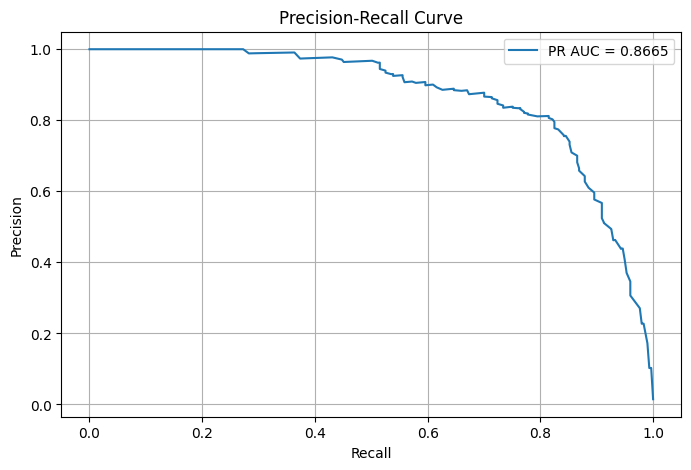

In [47]:
# Métricas - RF sem balaceamento
y_test = y_test_rf
y_pred = y_pred_sem_rf
y_proba = y_proba_sem_rf

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
print(f"\n📈 ROC AUC: {roc_auc:.4f}")
print(f"📉 PR AUC (Average Precision): {pr_auc:.4f}")

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()


🔍 Classification Report:
              precision    recall  f1-score   support

           0     0.9946    0.9986    0.9966     19736
           1     0.8716    0.6397    0.7379       297

    accuracy                         0.9933     20033
   macro avg     0.9331    0.8192    0.8672     20033
weighted avg     0.9928    0.9933    0.9928     20033


📊 Confusion Matrix:
[[19708    28]
 [  107   190]]

📈 ROC AUC: 0.9934
📉 PR AUC (Average Precision): 0.8500


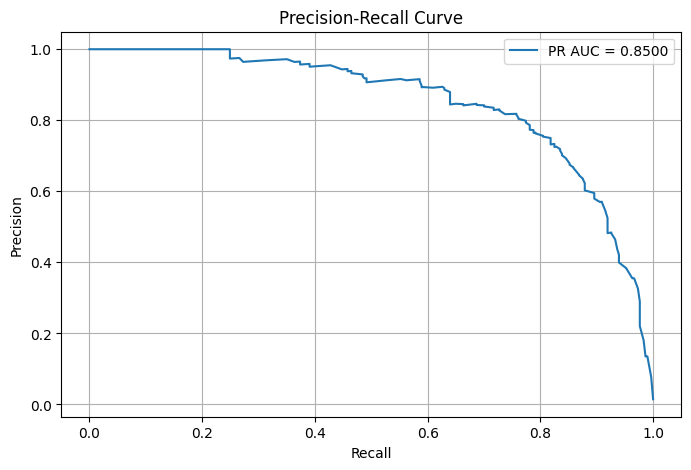

In [48]:
# Métricas - RF com balaceamento SMOTE
y_test = y_test_rf
y_pred = y_pred_smote_rf
y_proba = y_proba_smote_rf

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
print(f"\n📈 ROC AUC: {roc_auc:.4f}")
print(f"📉 PR AUC (Average Precision): {pr_auc:.4f}")

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()


🔍 Classification Report:
              precision    recall  f1-score   support

           0     0.9941    0.9988    0.9965     19736
           1     0.8867    0.6061    0.7200       297

    accuracy                         0.9930     20033
   macro avg     0.9404    0.8024    0.8582     20033
weighted avg     0.9925    0.9930    0.9924     20033


📊 Confusion Matrix:
[[19713    23]
 [  117   180]]

📈 ROC AUC: 0.9924
📉 PR AUC (Average Precision): 0.8638


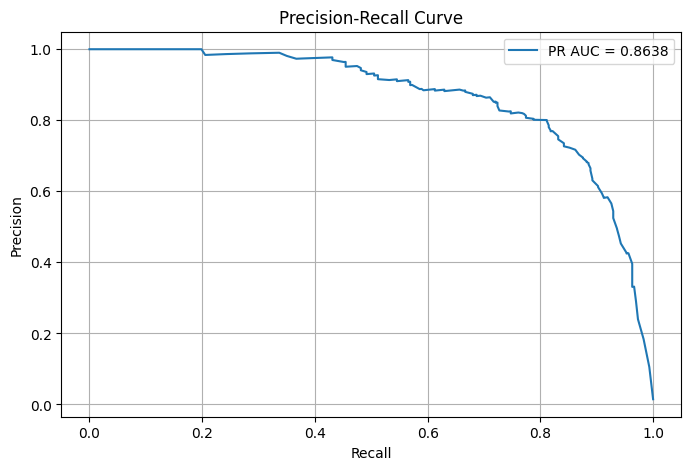

In [49]:
# Métricas - RF com balaceamento class_weight='balanced'
y_test = y_test_rf
y_pred = y_pred_weight_rf
y_proba = y_proba_weight_rf

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
print(f"\n📈 ROC AUC: {roc_auc:.4f}")
print(f"📉 PR AUC (Average Precision): {pr_auc:.4f}")

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()